In [49]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.patches import Rectangle
from src.loading import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
def _plot_olr_data(data):
    # Make contour plot of CERES OLR
    #
    fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))

    ax.coastlines(resolution='110m')
    ax.add_feature(cfeature.BORDERS, linestyle='-')

    cmap = plt.cm.jet
    norm = colors.Normalize(vmin=200, vmax=300)
    data.plot.contourf(ax=ax, cmap=cmap, norm=norm, levels=50, transform=ccrs.PlateCarree())

    ax.set_extent([110, 180, -10, 30], crs=ccrs.PlateCarree())

# CERES Observed OLR

In [62]:
# Load CERES OLR data
#
ceres = load_raw_ceres_data()
ceres_olr = ceres['toa_lw_all_1h']
ceres_olr = ceres_olr.isel(time=ceres_olr.time.dt.hour%3==0).mean('time')

/Users/pedro/miniconda3/envs/scale_interaction_in_gsam/lib/python3.13/site-packages/shapely/predicates.py:878: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


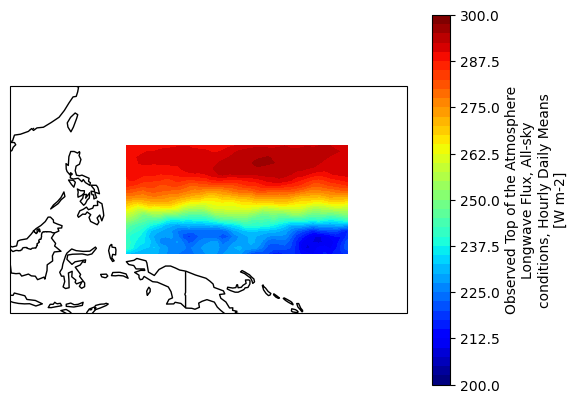

In [63]:
_plot_olr_data(ceres_olr)

# gSAM

In [64]:
# Load gSAM OLR data
#
gsam_olr = load_gsam_olr_on_1deg().mean('time')

/Users/pedro/miniconda3/envs/scale_interaction_in_gsam/lib/python3.13/site-packages/shapely/predicates.py:878: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


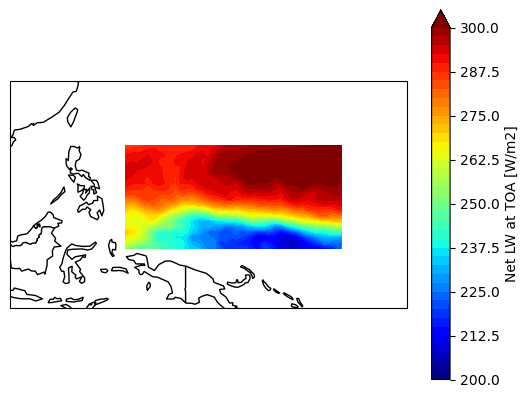

In [65]:
_plot_olr_data(gsam_olr)